In [1]:
import numpy as np
import math
import json
import glob
from functools import reduce

In [7]:
def load_results(dataset, model, pretrained, ckpt, metric, n_sample, seed):
    if pretrained:
        result_dir = f'../results/{dataset}/pretrained/{model}_{seed}-{ckpt}/{metric}_{n_sample}'
    else:
        result_dir = f'../results/{dataset}/scratch/{model}_{seed}-{ckpt}/{metric}_{n_sample}'
      
    result_fs = glob.glob(f'{result_dir}/*.json')
    results = []
    for file in result_fs:
        with open(file, 'r') as f:
            data = json.load(f)
        results.extend(data)
        
    return results

In [13]:
def get_base_est(dataset, model, pretrained, ckpt, metric, seed):
    if pretrained:
        result_dir = f'../cache/{dataset}/{model}_{seed}-{ckpt}/pretrained_cot_base.json'
    else:
        result_dir = f'../cache/{dataset}/{model}_{seed}-{ckpt}/scratch_cot_base.json'
    
    with open(result_dir, 'r') as f:
        base_est = json.load(f)['base']
    
    return base_est

In [8]:
n_sample_dict = {
    'CIFAR-10': -1, 
    'CIFAR-100': -1, 
    'Living-17': -1,
    'Nonliving-26': -1,
    'Entity-13': -1,
    'Entity-30': -1,
    'ImageNet': -1,
    'RxRx1': -1,
    'FMoW': -1,
    'Amazon': -1,
    'CivilComments': -1
}

n_epoch_dict = {
    'CIFAR-10': 300, 
    'CIFAR-100': 300, 
    'Living-17': 450,
    'Nonliving-26': 450,
    'Entity-13': 300,
    'Entity-30': 300,
    'ImageNet': 10,
    'FMoW': 50,
    'RxRx1': 90,
    'Amazon': 3,
    'CivilComments': 5
}

pretrained_dict = {
    'CIFAR-10': False, 
    'CIFAR-100': False, 
    'Living-17': False,
    'Nonliving-26': False,
    'Entity-13': False,
    'Entity-30': False,
    'ImageNet': True,
    'FMoW': True,
    'RxRx1': True,
    'Amazon': True,
    'CivilComments': True
}

In [9]:
dataset = 'Entity-30'
arch = 'resnet50'
n_sample = n_sample_dict[dataset]
seed = '1'
model_ckpt = n_epoch_dict[dataset]
pretrained = pretrained_dict[dataset]

In [10]:
cot_results = load_results(dataset, arch, pretrained, model_ckpt, 'COT', n_sample, seed)
cot_max_results = load_results(dataset, arch, pretrained, model_ckpt, 'COT-Max', n_sample, seed)

In [14]:
cot_max_base = get_base_est(dataset, arch, pretrained, model_ckpt, metric, seed)

In [23]:
cot_metrics = np.array([i['metric'] for i in cot_results])
cot_max_metrics = np.array([i['metric'] for i in cot_max_results])

In [24]:
ratio = cot_metrics / cot_max_metrics

In [26]:
import matplotlib.pyplot as plt

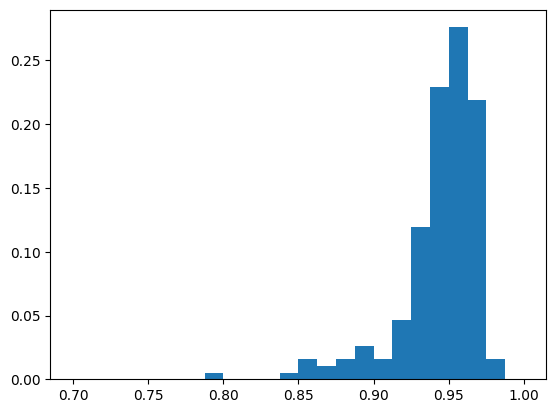

In [38]:
plt.hist(ratio, bins=np.arange(0.7, 1, 0.0125), weights=[1/len(ratio)] * len(ratio))
plt.show()